In [ ]:
import numpy as np
import timeit
import kernel_rl
import torch
from matplotlib import pyplot as plt
import pandas as pd
import importlib

In [ ]:
subject_trials = "../saved_data/all_Yuri.csv"
data = pd.read_csv(subject_trials, sep="\t")

In [ ]:
print(len(data))
data.head()

In [ ]:
start = timeit.default_timer()
kernel_rl = importlib.reload(kernel_rl)
model = kernel_rl.KernelRL(resolution=36, device="cpu")
state_space = model.fit(data.head(100000), epochs=200)

In [ ]:
print(torch.min(state_space[-1]), torch.max(state_space[-1]))
plt.imshow(state_space[-1].detach().cpu().numpy())

In [ ]:
initp = model.init_prob.detach().cpu().numpy()
print(np.min(initp), np.max(initp))
plt.imshow(initp)

In [ ]:
cov = model.kernel_cov.detach().cpu().numpy()
print(cov @ cov.T)


In [19]:
from neurotools import util
state_space = torch.zeros((10, 10))
k = util.gaussian_kernel(kernel_size=(10, 10), cov=torch.tensor([[2., 0.], [0., 2.]]))

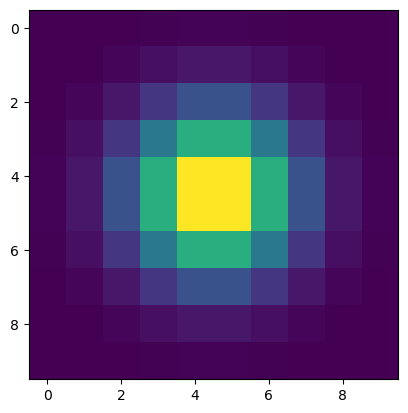

In [20]:
state_space = state_space + k
plt.imshow(state_space)

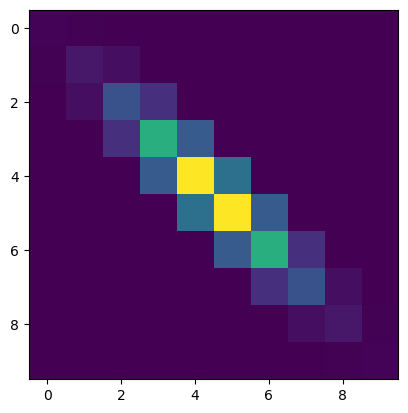

In [18]:
mu = [5, 5]
state_space = torch.zeros((10, 10))
state_space = state_space + torch.roll(k, (mu[0] - len(state_space) // 2, mu[1] - len(state_space) // 2), dims=(0, 1))
plt.imshow(state_space)